# Professor Bear :: Image Analysis :: Hough transforms

## Professor Bear github


Code for Professor Bear YouTube videos at https://github.com/nikbearbrown


## Download Anaconda 4 for Python 2.7

Download Anaconda 4 for  Python 2.7 version
[https://www.continuum.io/downloads](https://www.continuum.io/downloads)
    
Anaconda 4.3.0 includes an easy installation of Python (2.7.13, 3.4.5, 3.5.2, and/or 3.6.0) and updates of over 100 pre-built and tested scientific and analytic Python packages. These packages include NumPy, Pandas, SciPy, Matplotlib, and Jupyter. Over 620 more packages are available.    
[https://docs.continuum.io/anaconda/pkg-docs](https://docs.continuum.io/anaconda/pkg-docs)
        

## iPython

Go to the directory that has your iPython notebook

At the command line type

_jupyter notebook notebookname_

_ipython notebook notebookname_  will also work

For example,

jupyter notebook Professor_Bear_Image_Analysis_Loading_Histograms.ipynb



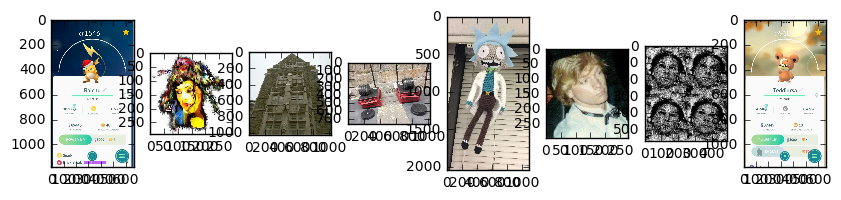

In [1]:
# Bring in python image analysis libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import color
import skimage.filters as filters
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
from skimage import feature
from skimage import morphology
from skimage.draw import circle_perimeter
from skimage import img_as_float, img_as_ubyte
from skimage import segmentation as seg
from skimage.morphology import watershed
from scipy import ndimage as nd
from scipy.ndimage import convolve
from skimage import feature
import glob # for bulk file import

# Set defaults
plt.rcParams['image.cmap'] = 'gray' # Display grayscale images in... grayscale.
plt.rcParams['image.interpolation'] = 'none' # Use nearest-neighbour
plt.rcParams['figure.figsize'] = 10, 10

# Import test images
imgpaths = glob.glob("./img/*.jpg") + glob.glob("./img/*.png")
# imgpaths = glob.glob("img/*.jpg") + glob.glob("img/*.png")  Windows
# Windows has different relative paths than Mac/Unix
imgset = [mpimg.imread(x) for x in imgpaths]

# Display thumbnails of the images to ensure loading
plt.figure()
for i,img in enumerate(imgset):
    plt.subplot(1, len(imgset), i+1)
    plt.imshow(img, cmap = 'gray')

## Hough transforms

The Hough transform (https://en.wikipedia.org/wiki/Hough_transform) is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure. This voting procedure is carried out in a parameter space, from which object candidates are obtained as local maxima in a so-called accumulator space that is explicitly constructed by the algorithm for computing the Hough transform. 

In [2]:
# Plot the circular Hough transforms of an image at the given radii.
def plot_circle_hough(img, radii, sigma):
    edges = feature.canny(img, sigma)
    hough = hough_circle(edges, radii)
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(imgbw)
    plt.subplot(1, 2, 2)
    plt.imshow(edges)
    plt.figure()
    for j in range(len(hough)):
        plt.subplot(1, len(hough), j+1)
        plt.imshow(hough[j,:,:]) 

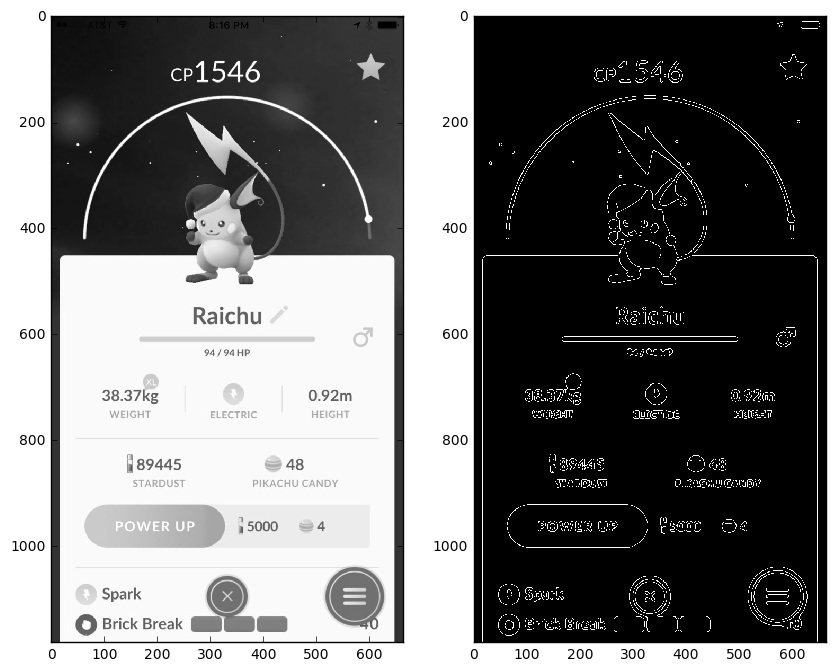

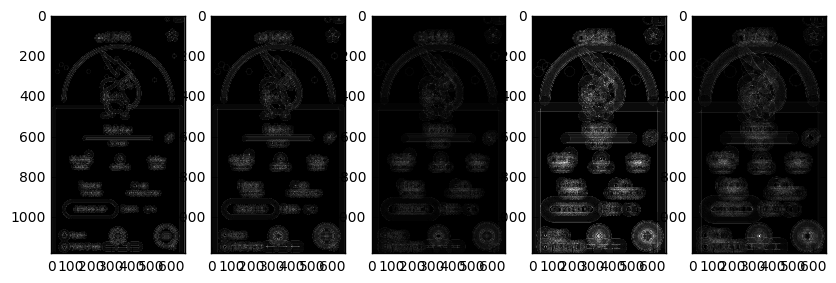

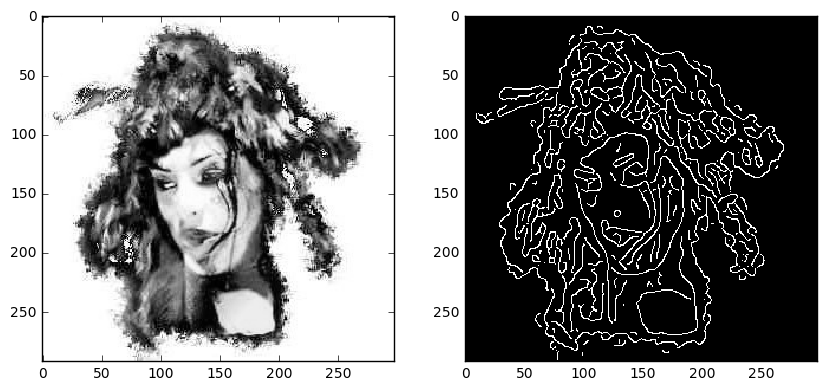

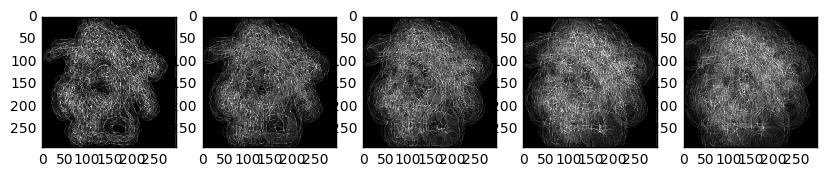

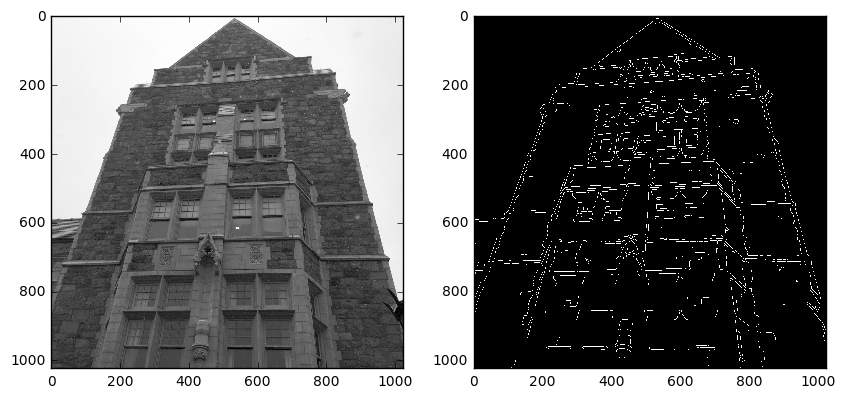

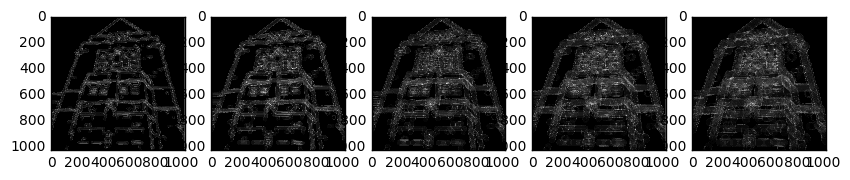

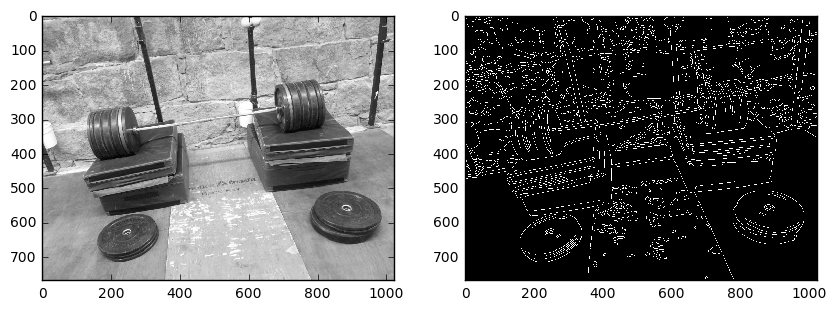

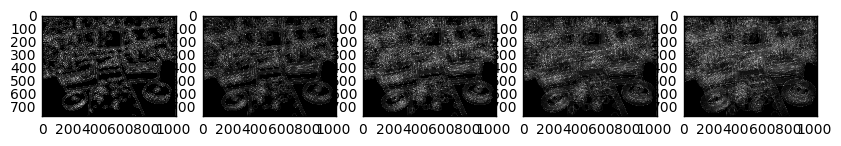

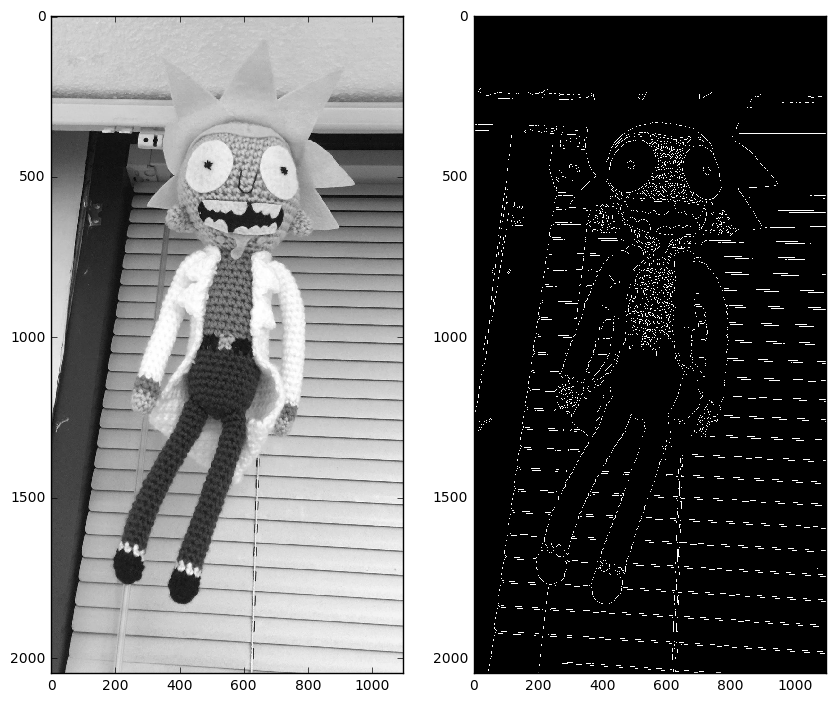

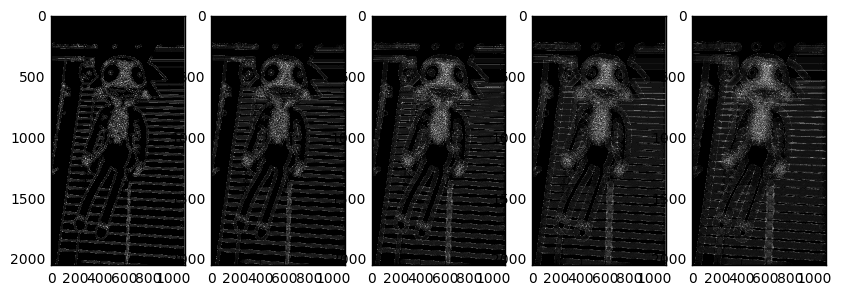

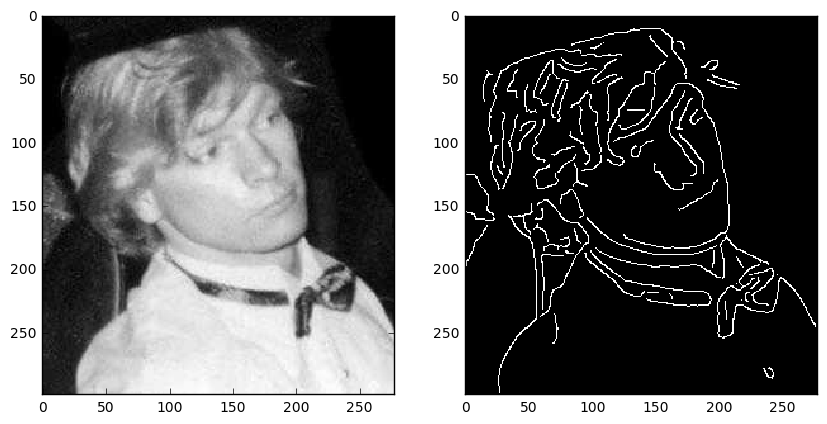

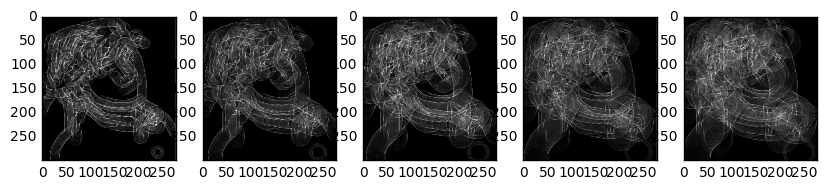

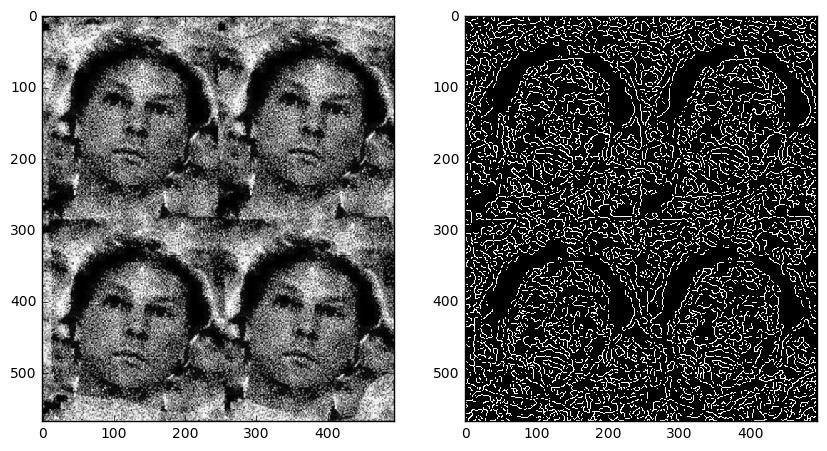

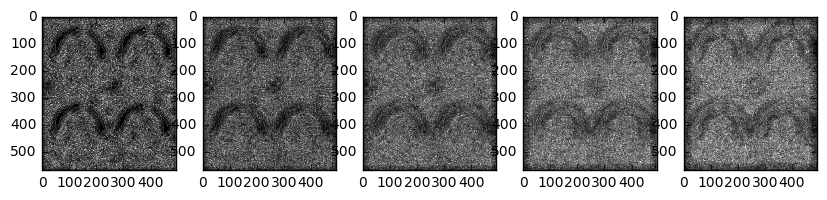

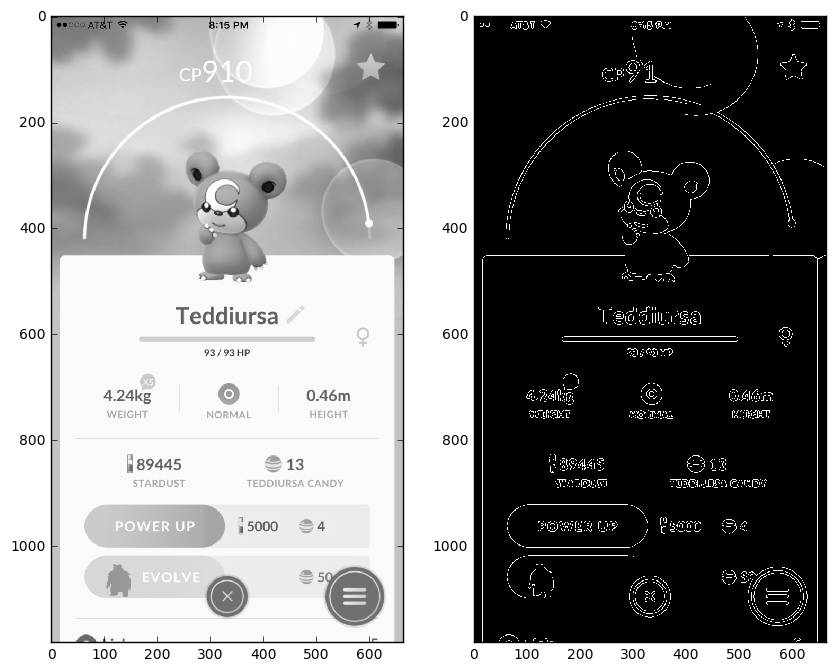

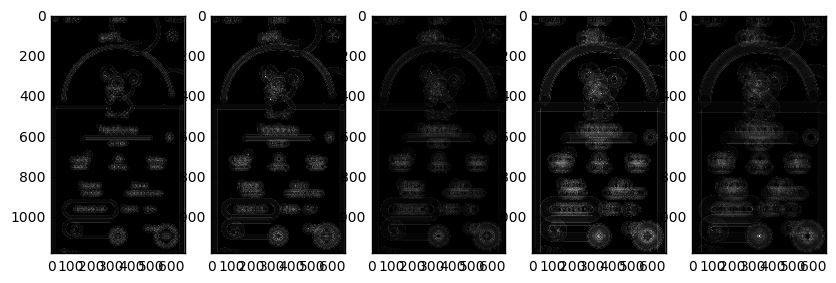

In [3]:
# Apply to test images
radii = np.arange(10, 35, 5)
sigma = 2.0
for i,img in enumerate(imgset):
    imgbw = img_as_float(color.rgb2grey(img)) # downsample to make it easier to see graphs
    plot_circle_hough(imgbw, radii, sigma)

In [4]:
def plot_detected_circles(img, radii, sigma):
    edges = filters.canny(img, sigma)
    hough = hough_circle(edges, radii)
    
    # Code after this point adapted from the scikit documentation. Not fully sure how it works.
    accums = []
    found_centers = []
    found_radii = []

    for radius, h in zip(radii, hough):
        # For each radius, extract two circles
        peaks = peak_local_max(h, num_peaks=2)
        found_centers.extend(peaks)
        accums.extend(h[peaks[:, 0], peaks[:, 1]])
        found_radii.extend([radius, radius])
        
    # Draw the most prominent 5 circles
    image = color.gray2rgb(img)
    for idx in np.argsort(accums)[::-1][:5]:
        center_x, center_y = found_centers[idx]
        radius = found_radii[idx]
        cx, cy = circle_perimeter(center_y, center_x, radius)
        image[cy, cx] = (220, 20, 20)

    plt.imshow(image, cmap=plt.cm.gray)

# Python Tutorials

Python 101 [Beginning Python http://www.rexx.com/~dkuhlman/python_101/python_101.html](Beginning Python http://www.rexx.com/~dkuhlman/python_101/python_101.html)

The Official Python Tutorial - [http://www.python.org/doc/current/tut/tut.html](http://www.python.org/doc/current/tut/tut.html() 

The Python Quick Reference -[http://rgruet.free.fr/PQR2.3.html](http://rgruet.free.fr/PQR2.3.html) 

YouTube Python Tutorials 

Google Python Class - [http://www.youtube.com/watch?v=tKTZoB2Vjuk](http://www.youtube.com/watch?v=tKTZoB2Vjuk) 
                                                                              
Python Fundamentals Training – Classes [http://www.youtube.com/watch?v=rKzZEtxIX14](http://www.youtube.com/watch?v=rKzZEtxIX14)

Python 2.7 Tutorial Derek Banas - [http://www.youtube.com/watch?v=UQi-L-_chcc](http://www.youtube.com/watch?v=UQi-L-_chcc)

Python Programming Tutorial thenewboston - [http://www.youtube.com/watch?v=4Mf0h3HphEA](http://www.youtube.com/watch?v=4Mf0h3HphEA)







# Evaluation

Install Anaconda 4 for  Python 2.7 and get this notebook to run with a set of your images.
